In [1]:
import gaiaxpy as gxp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sdss

from astroML.sum_of_norms import sum_of_norms, norm
from astroquery.gaia import Gaia
from astroquery.sdss import SDSS as aq_sdss

In [3]:
df = pd.read_csv('../data/main_table.csv')

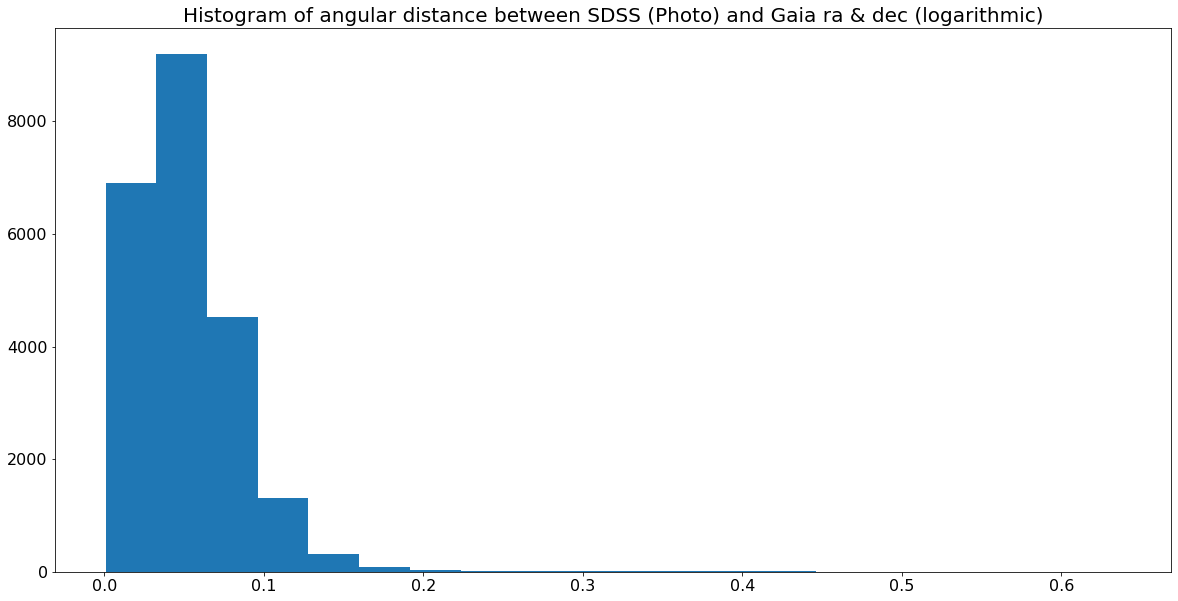

In [4]:
plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.title('Histogram of angular distance between SDSS (Photo) and Gaia ra & dec (logarithmic)', fontsize=20)
plt.hist(df['angular_distance'], bins=20)
None

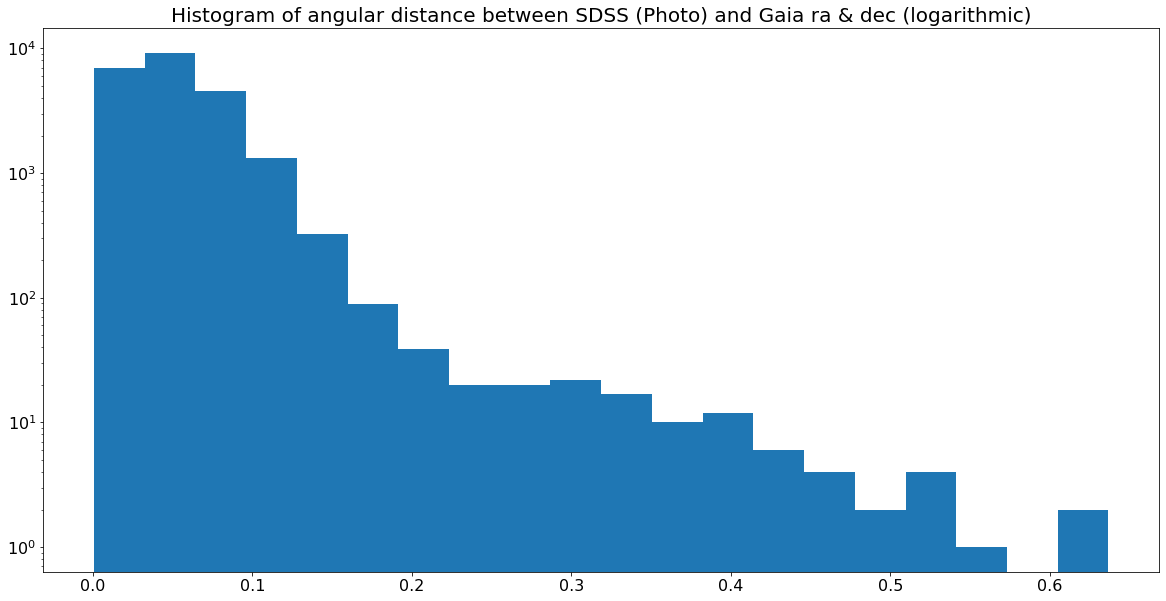

In [5]:
plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.title('Histogram of angular distance between SDSS (Photo) and Gaia ra & dec (logarithmic)', fontsize=20)
plt.hist(df['angular_distance'], bins=20)
plt.yscale('log')

In [18]:
halfDecDiff = np.deg2rad(df['photoDec'] - df['gaia_dec'])/2
halfRaDiff = np.deg2rad(df['photoRa'] - df['gaia_ra'])/2
gaia_dec = np.deg2rad(df['gaia_dec'])
photoDec = np.deg2rad(df['photoDec'])
arg = np.sin(halfDecDiff)**2 + np.cos(gaia_dec)*np.cos(photoDec)*np.sin(halfRaDiff)**2

ang_dist = 2 * np.arcsin(np.sqrt(arg))    # rad
ang_dist = np.rad2deg(ang_dist) * 3600  # arcsec

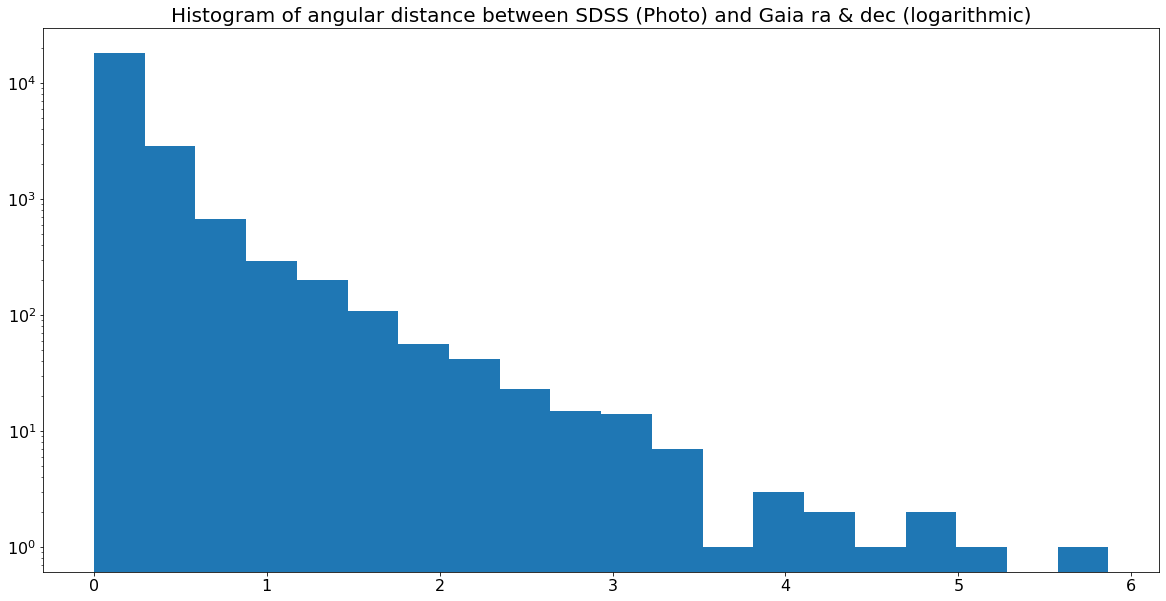

In [19]:
plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.title('Histogram of angular distance between SDSS (Photo) and Gaia ra & dec (logarithmic)', fontsize=20)
plt.hist(ang_dist, bins=20)
plt.yscale('log')

In [8]:
df.loc[df['angular_distance'] == max(df['angular_distance'])].transpose()

,14268
source_id,2.537014e+18
clean_sdssdr13_oid,7.143846e+07
original_ext_source_id,1.237657e+18
angular_distance,6.368259e-01
gaia_ra,1.180565e+01
gaia_dec,-9.444624e-02
phot_g_mean_mag,1.747954e+01
bp_g,1.133232e+00
g_rp,1.462488e+00
objId,1.237657e+18


In [9]:
df_filt = df.loc[(df['psfMag_g'] - df['psfMag_i'] < 2) & (df['psfMag_g'] - df['psfMag_i'] > 0 )]
mag_diff = df_filt['phot_g_mean_mag'] - df_filt['psfMag_r']

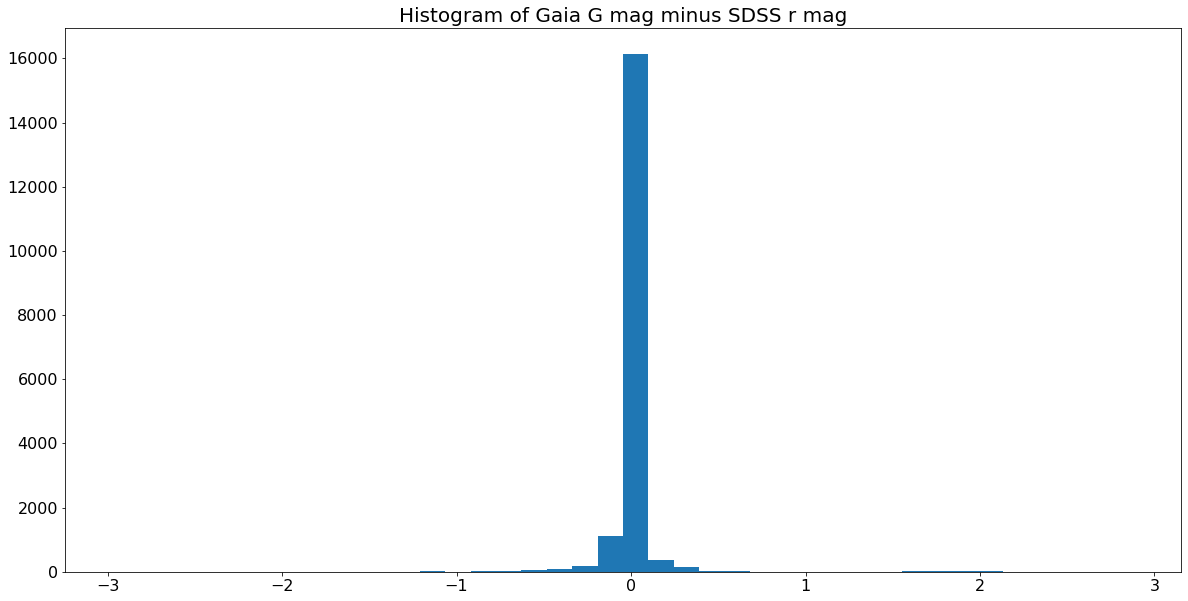

In [10]:
plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.title('Histogram of Gaia G mag minus SDSS r mag', fontsize=20)
plt.hist(mag_diff, bins=40)
None

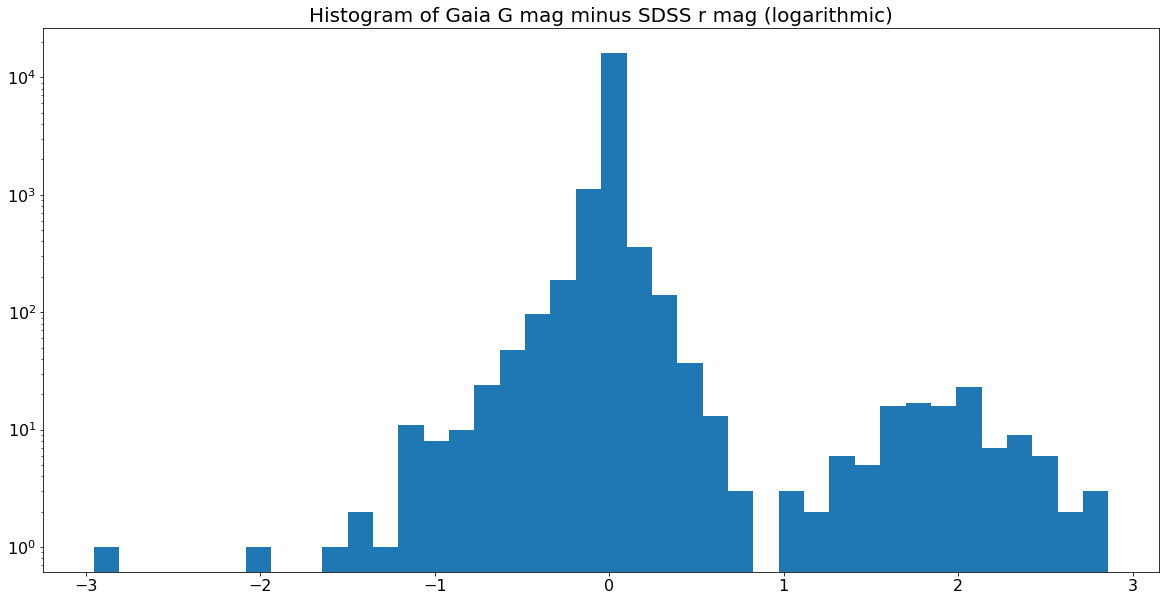

In [11]:
plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.title('Histogram of Gaia G mag minus SDSS r mag (logarithmic)', fontsize=20)
plt.hist(mag_diff, bins=40)
plt.yscale('log')